<a href="https://colab.research.google.com/github/Morax19/ML_UCV/blob/main/Proyecto1/ML_Proyecto1_DanielHernandez_JuanPRivas_JoinerRojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
Universidad Central de Venezuela

Facultad de Ciencias

Escuela de Computación

Aprendizaje Automático
<br>
<br>
<br>
<br>

<center>PROYECTO #1: APRENDIZAJE SUPERVISADO</center>
<br>
<br>
<br>
<br>
Autores:
<br>Juan Pablo Rivas - CI: 28304720
<br>Joiner Rojas - CI: 29501730
<br>Daniel Hernández - CI: 27795163
<br>
<br>
Fecha: 11 de marzo de 2025</center>

## Parte 1: Entendimiento y análisis de los datos

### Planteamiento del problema

El dataset que vamos a utilizar es **[Stroke Risk Prediction Dataset based on Literature](https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset-v2)**, ademas de eso, haremos uso de diferentes MRIs obtenidos de los datasets:

* ()[]
* ()[]
* ()[]
* ()[]

A lo largo de este notebook, buscaremos entrenar un modelo que sea capaz de predecir la probabilidad que tiene una persona de sufrir un ataque cerebrovascular (ACV) basandonos en diferentes sintomas que presenta la misma. Para ello haremos uso del primer dataset y de multiples modelos de regresion, usaremos deiferentes metricas para compararlos y escoger aquel que nos ofrezca un mejor resultado.

Tambien usaremos los diferentes MRIs para resolver un problema de clasificacion, ya que buscaremos un modelo que sea capaz de diferenciar entre un cerebro sano de uno que haya sufrido un ACV basandonos en estas imagenes, de forma similar al problema de regresion, vamos a entrenar diferentes modelos y compararlos usando las metricas correspondientes y almacenaremos aquel que nos de el mejor resultado posible.

### Configuración del entorno

Lo primero que haremos será definir la semilla que vamos a utilizar, siendo esta la suma de las cédulas de identidad de cada integrante divida entre la cantidad de integrantes:

In [35]:
SEED = (27795163 + 28304720 + 29501730)//3
print(SEED)

28533871


Luego, procedemos a instalar los componentes necesarios para la descarga de los datos:

In [10]:
!pip install mlcroissant
!pip install opendatasets

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/140.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.9/564.9 kB 21.9 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15130 sha256=7537fcb4f5cc3a8580b929e742a25ea6d77ef13bfe026cc30bd7269df19103f5
  Stored in directory: /root/.cache/pip/wheels/53/cf/51/a4ea10224b7fdb523e18e2033cadf2a8657517d1f95f3f5413
Successfully built jsonpath-rw


Por último, haremos los imports de las librerias que serán necesarias a lo largo de todo el notebook:

In [11]:
# Agregar librerías acá
import re
import hashlib
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as ods
import matplotlib.pyplot as plt

# Metricas y preprocesamiento
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

### Análisis exploratorio de los datos

Para iniciar el analisis exploratorio de datos, vamos a descargar los mismos:

In [12]:
#Descarga del primer dataset
ods.download(
    "https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset-v2"
    )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: danielhernndez
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset-v2


100%|██████████| 240k/240k [00:00<00:00, 41.1MB/s]

In [105]:
# Almacenamos los datos en un Data Frame
rawData = pd.read_csv("/content/stroke-risk-prediction-dataset-v2/stroke_risk_dataset_v2.csv")

# Se muestran una vista previa de los datos
rawData

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,32,Female,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15.7,0
34996,29,Female,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,19.3,0
34997,44,Female,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,46.8,0
34998,28,Female,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13.9,0


Para saber si tenenmos valores nulos en alguna instancia de nuestras variables, debemos tener una vista más detallada de los datos, para ello se tiene el siguiente fragmento de código:

In [106]:
# Información detallada del dataset
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

Podemos observar entonces que tenemos 19 variables para 35 mil pacientes, sin valores nulos en ninguna instancia. Como siguiente observación veamos la cantidad de pacientes hombres y mujeres existentes para validar que no haya ningún sesgo por género, ademas debemos revisar la cantidad de pacientes que se encuentran en riesgo o no, y así saber si las clases que vamos a definir están o no balanceadas.

In [80]:
print(f"Cantidad de pacientes hombres: {rawData[rawData['gender'] == 'Male'].shape[0]}")
print(f"Cantidad de pacientes mujeres: {rawData[rawData['gender'] == 'Female'].shape[0]}")
print(f"Cantidad de pacientes en riesgo de sufrir ACV: {rawData[rawData['at_risk'] == 1].shape[0]}")
print(f"Cantidad de pacientes que no están en riesgo de sufrir un ACV: {rawData[rawData['at_risk'] == 0].shape[0]}")

Cantidad de pacientes hombres: 17472
Cantidad de pacientes mujeres: 17528
Cantidad de pacientes en riesgo de sufrir ACV: 12887
Cantidad de pacientes que no están en riesgo de sufrir un ACV: 22113


Podemos ver que tenemos una cantidad similar de pacientes masculinos y femeninos, sin embargo existen un desbalance en cuanto a pacientes propensos a sufrir un ACV o no, es importante tener esto en cuenta al momento de separar los datos para entrenamiento y prueba.

Por ultimo, vamos a observar valores extremos presentes en los datos, por ejemplo, aquellos pacientes con una mayor posibilidad de estar en riesgo y aquel o aquellos con la menor probabilidad de estarlo.

In [107]:
# Aquellos pacientes que tienen un 100% de probabilidad de estar en riesgo.
maxRisk = rawData[rawData['stroke_risk_percentage'] == rawData['stroke_risk_percentage'].max()]

#Aquellos pacientes cuya probabilidad de sufrir un ACV es de 0.
minRisk = rawData[rawData['stroke_risk_percentage'] == rawData['stroke_risk_percentage'].min()]

# Cantidades obtenidas
print(f"Cantidad de pacientes de alto riesgo: {maxRisk.shape[0]}")
print(f"Cantidad de pacientes de riesgo nulo: {minRisk.shape[0]}")

Cantidad de pacientes de alto riesgo: 3725
Cantidad de pacientes de riesgo nulo: 6


In [20]:
maxRisk

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
17,64,Female,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,100.0,1
23,68,Female,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,100.0,1
57,51,Female,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34953,65,Female,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,100.0,1
34954,51,Male,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,100.0,1
34961,68,Male,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,100.0,1
34987,50,Male,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,100.0,1


In [21]:
minRisk

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
11512,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0
23735,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0
26401,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0
28756,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0
30919,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0
32904,18,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0


### Pre-procesamiento

Para comenzar esta seccion, lo primero que haremos sera modificar la variable 'gender' de forma que podamos trabajar exclusivamente con valores numericos en lugar de variables categoricas. Ademas debemos normalizar los valores de la columna 'stroke_risk_percentage' para que esten entre 0 y 1.

In [81]:
# Definimos nuestra instancia para el OneHotEncoder
encoder = OneHotEncoder()

# Se modifican las columnas y se almacenan en un nuevo Data Frame
encodedData = encoder.fit_transform(rawData[['gender']])
encodedData = pd.DataFrame(encodedData.toarray(), columns=encoder.get_feature_names_out(['gender']))

# Concatenamos los Data Frames en uno nuevo para que se reflejen los cambios
finalData = pd.concat([encodedData, rawData.drop(['gender'],axis = 1)],axis = 1)

# Normalizamos los valores de los porcentajes
finalData['stroke_risk_percentage']/=100

# Vista previa de los datos pre-procesados
finalData.head()

,gender_Female,gender_Male,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,0.0,1.0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.333,0
1,0.0,1.0,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1.000,1
2,1.0,0.0,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1.000,1
3,0.0,1.0,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.445,0
4,0.0,1.0,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0.848,1


Con este cambio, podemos calcular la matriz de correlación entre variables, obteniendo como resultado:

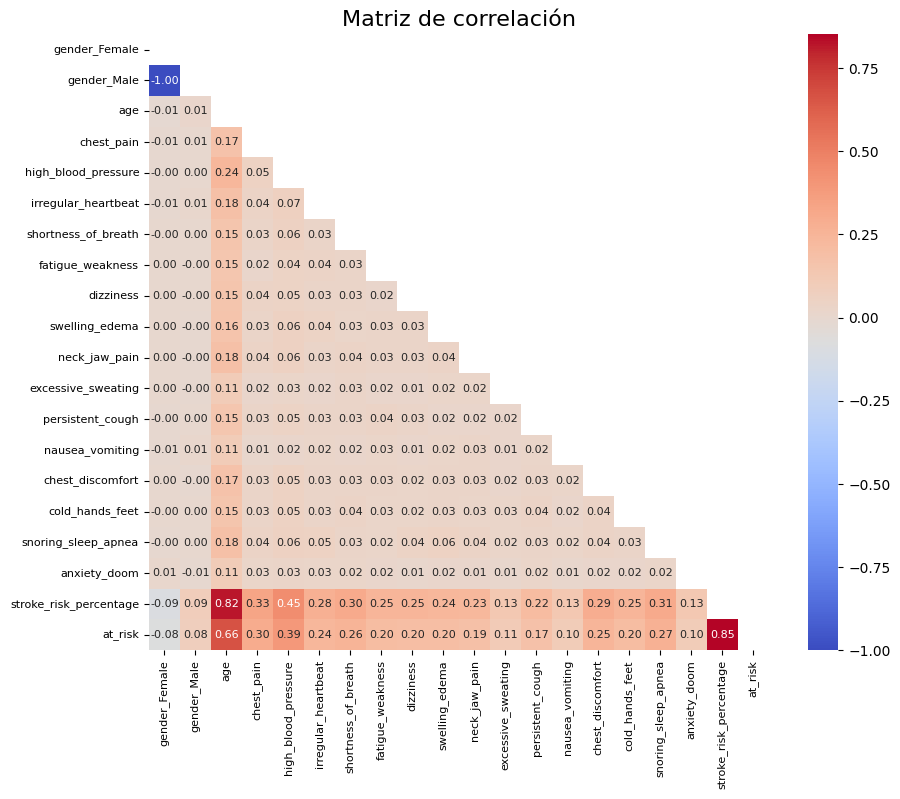

In [49]:
# Definimos una máscara para la matriz de correlación
mask = np.triu(np.ones_like(finalData.corr(), dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(finalData.corr(), annot=True, fmt=".2f", mask = mask, cmap="coolwarm", annot_kws={"fontsize": 8})
plt.title("Matriz de correlación", fontsize=16) # Título del gráfico
plt.tick_params(axis='both', labelsize=8) # Reduce el tamaño de las etiquetas del eje
plt.show()

Nuestro siguiente paso será separar los datos en los conjuntos de prueba y entrenamiento para los correspondientes modelos de regresión que deseamos entrenar, para ello debemos separar los datos de las correspondientes etiquetas presentes en las columnas 'stroke_risk_percentage' para regresión, por ello hacemos:

In [102]:
# Datos sin las etiquetas
X = finalData.copy().drop(['stroke_risk_percentage', 'at_risk'],axis = 1)

# Vista previa de los datos
X

,gender_Female,gender_Male,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom
0,0.0,1.0,22,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.0,1.0,52,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
2,1.0,0.0,63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.0,1.0,41,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,53,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,1.0,0.0,32,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
34996,1.0,0.0,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
34997,1.0,0.0,44,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1
34998,1.0,0.0,28,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Ademas de los datos, debemos separar las etiquetas antes mencionadas, en el caso de regresion tenemos:

In [100]:
# Etiquetas para los modelos de regresion
yProba = finalData['stroke_risk_percentage']

# Vista previa de las etiquetas
yProba

,stroke_risk_percentage
0,0.333
1,1.000
2,1.000
3,0.445
4,0.848
...,...
34995,0.157
34996,0.193
34997,0.468
34998,0.139


Por ultimo, para los modelos de clasificacion tenemos:

In [101]:
# Etiquetas para los modelos de clasificacion
yClass = finalData['at_risk']

#Vista previa de las clases
yClass

,at_risk
0,0
1,1
2,1
3,0
4,1
...,...
34995,0
34996,0
34997,0
34998,0


In [111]:
# Separamos los datos en gruos de entrenamiento y prueba usando una relación de 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X, yProba, test_size=0.2, random_state=SEED)

## Parte 2: Modelo de aprendizaje supervisado

Pequeña explicación de como el modelo que usaremos va a solucionar uno de los problemas planteados

#### Métricas

Para evaluar el rendimiento de los modelos de regresión planteados en esta sección haremos uso de las siguientes métricas:

* $R^2$: El coeficiente de determinación, nos indica que tan bueno es el rendimiento de nuestro modelo en comparación a la peor solución posible.

* $MSE$: El error cuadrático medio, nos indica que tanto alejada está la respuesta del modelo respecto al valor real esperado.

* $RMSE$: Es la raíz cuadrada del error cuadrático medio, nos dice que tanto se está equivocando en promedio nuestro modelo en la misma proporción del problema.

#### 1. Regresión Lineal sin regularización

Habladera del modelo(?

1. Imports.

In [108]:
#Modelos regresion
from sklearn.linear_model import LinearRegression

2. Entrenamiento y prueba del modelo.

Se entrena el modelo con los datos que correspondientes

In [109]:
# Se define el modelo a usar
linearModel = LinearRegression()

# DND... Machine is learning
linearModel.fit(X_train, y_train)

LinearRegression()

Una vez finalizado el proceso de entrenamiento, podemos hacer predicciones con el conjunto de datos definido para prueba.

In [121]:
linearPredictions = linearModel.predict(X_test)

print(f"Las predicciones hechas por el modelo son: {linearPredictions}")
print(f"Las etiquetas reales son: {y_test.values}")

Las predicciones hechas por el modelo son: [0.74435369 0.35786178 0.30886109 ... 0.45925776 0.14635667 0.38605777]
Las etiquetas reales son: [1.    0.282 0.276 ... 0.457 0.224 0.335]


4. Resultados obtenidos.

Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

In [122]:
linearModelRMSE = cross_val_score(linearModel, X, yProba, cv=5, scoring='neg_root_mean_squared_error')*-1
linearModelMSE = cross_val_score(linearModel, X, yProba, cv=5, scoring='neg_mean_squared_error')*-1
linearModelr2 = cross_val_score(linearModel, X, yProba, cv=5, scoring='r2')

print(f"RMSE obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de {np.round(np.mean(linearModelRMSE),50)}")
print(f"MSE obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de {np.round(np.mean(linearModelMSE),50)}")
print(f"R^2 obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de {np.round(np.mean(linearModelr2),50)}")

RMSE obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de 0.0725373388580488
MSE obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de 0.00526516001732452
R^2 obtenido por el modelo de Regresión Lineal (Sin regularización) en validación cruzada con 5 slices es de 0.9410699008422231


#### Regresión Lineal con regularizacion $l_1$ (Lasso)

Habladera del modelo(?

1. Imports

In [123]:
from sklearn.linear_model import Lasso

2. Calculo de hiperparametros y entrenamiento del modelo.

Explicacion de los hiperparametros del modelo

In [126]:
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'max_iter': [1000, 10000, 100000],
    'tol': [1e-3, 1e-4, 1e-5],
    'selection': ['cyclic', 'random'],
    'warm_start': [True, False]
    }

In [127]:
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_root_mean_squared_error')

# Be quiet! Machine's learning over here
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 10000, 100000],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.001, 0.0001, 1e-05],
                         'warm_start': [True, False]},
             scoring='neg_root_mean_squared_error')

3. Resultados obtenidos

Predicciones:

In [129]:
lassoModel = grid_search_lasso.best_estimator_
lassoPredictions = lassoModel.predict(X_test)

print(f"Las predicciones hechas por el modelo son: {lassoPredictions}")
print(f"Las etiquetas reales son: {y_test.values}")

Las predicciones hechas por el modelo son: [0.75410076 0.35756558 0.30867197 ... 0.45636575 0.13958874 0.40162754]
Las etiquetas reales son: [1.    0.282 0.276 ... 0.457 0.224 0.335]


Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

In [130]:
lassoModelRMSE = cross_val_score(lassoModel, X, yProba, cv=5, scoring='neg_root_mean_squared_error')*-1
lassoModelMSE = cross_val_score(lassoModel, X, yProba, cv=5, scoring='neg_mean_squared_error')*-1
lassoModelr2 = cross_val_score(lassoModel, X, yProba, cv=5, scoring='r2')

print(f"RMSE obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de {np.round(np.mean(lassoModelRMSE),50)}")
print(f"MSE obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de {np.round(np.mean(lassoModelMSE),50)}")
print(f"R^2 obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de {np.round(np.mean(lassoModelr2),50)}")

RMSE obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de 0.07341766409684902
MSE obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de 0.005392244723163778
R^2 obtenido por el modelo de Regresión Lineal (Con regularización Lasso) en validación cruzada con 5 slices es de 0.9396518454210703


#### Regresión Lineal con regularizacion $l_2$ (Ridge)

Habladera del modelo(?

1. Imports

In [131]:
from sklearn.linear_model import Ridge

2. Calculo de hiperparametros y entrenamiento del modelo:

Explicacion de los hiperparametros del modelo

In [136]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'max_iter': [1000, 10000, 100000],
    'tol': [1e-3, 1e-4, 1e-5],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }

In [137]:
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_root_mean_squared_error')

# Be quiet! Machine's learning over here
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 10000, 100000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='neg_root_mean_squared_error')

3. Resultados obtenidos

Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

In [138]:
ridgeModel = grid_search_ridge.best_estimator_
ridgePredictions = ridgeModel.predict(X_test)

print(f"Las predicciones hechas por el modelo son: {ridgePredictions}")
print(f"Las etiquetas reales son: {y_test.values}")

Las predicciones hechas por el modelo son: [0.74432616 0.35779431 0.30884405 ... 0.45927507 0.14630338 0.38609667]
Las etiquetas reales son: [1.    0.282 0.276 ... 0.457 0.224 0.335]


In [139]:
ridgeModelRMSE = cross_val_score(ridgeModel, X, yProba, cv=5, scoring='neg_root_mean_squared_error')*-1
ridgeModelMSE = cross_val_score(ridgeModel, X, yProba, cv=5, scoring='neg_mean_squared_error')*-1
ridgeModelr2 = cross_val_score(ridgeModel, X, yProba, cv=5, scoring='r2')

print(f"RMSE obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de {np.round(np.mean(ridgeModelRMSE),50)}")
print(f"MSE obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de {np.round(np.mean(ridgeModelMSE),50)}")
print(f"R^2 obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de {np.round(np.mean(ridgeModelr2),50)}")

RMSE obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de 0.07253714417678962
MSE obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de 0.005265242389812683
R^2 obtenido por el modelo de Regresión Lineal (Con regularización Ridge) en validación cruzada con 5 slices es de 0.9410636851953466


#### Redes Elásticas

Habladera del modelo(?

1. Imports

In [ ]:
from sklearn.linear_model import Lasso

2. Calculo de hiperparametros

Explicacion de los hiperparametros del modelo

3. Entrenamiento y pruebas

4. Resultados obtenidos

Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

#### K-Vecinos para Regresión

Habladera del modelo(?

1. Imports

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

2. Metricas a usar para medir el rendimiento

Breve explicacion de las metricas y justificacion de su uso.

3. Calculo de hiperparametros

Explicacion de los hiperparametros del modelo

4. Resultados obtenidos

Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

#### Máquinas de Soporte Vectorial para Regresión

Habladera del modelo(?

1. Imports

In [ ]:
from sklearn.svm import SVR


2. Metricas a usar para medir el rendimiento

Breve explicacion de las metricas y justificacion de su uso.

3. Calculo de hiperparametros

Explicacion de los hiperparametros del modelo

4. Resultados obtenidos

Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

#### Árbol de Decisión para Regresión

Habladera del modelo(?

1. Imports

In [ ]:
from sklearn.tree import DecisionTreeRegressor


2. Metricas a usar para medir el rendimiento

Breve explicacion de las metricas y justificacion de su uso.

3. Calculo de hiperparametros

Explicacion de los hiperparametros del modelo

4. Resultados obtenidos

Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

#### Random Forest para Regresión

Habladera del modelo(?

1. Imports

In [ ]:
from sklearn.ensemble import RandomForestRegressor

2. Metricas a usar para medir el rendimiento

Breve explicacion de las metricas y justificacion de su uso.

3. Calculo de hiperparametros

Explicacion de los hiperparametros del modelo

4. Resultados obtenidos

Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

### Conclusiones

Habladera de que modelo vamos a elegir al final y justificar porque, ademas de agregar la parte de almacenar el modelo

## Parte 3: Modelo de aprendizaje no supervisado

Same as above, explicación de como el modelo va a solucionar un problema planteado

### Comparativa entre modelos propuestos

#### Modelo 1

Habladera del modelo(?

1. Imports

2. Metricas a usar para medir el rendimiento

Breve explicacion de las metricas y justificacion de su uso.

3. Calculo de hiperparametros

Explicacion de los hiperparametros del modelo

4. Resultados obtenidos

Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

#### Modelo 2

Habladera del modelo(?

1. Imports

2. Metricas a usar para medir el rendimiento

Breve explicacion de las metricas y justificacion de su uso.

3. Calculo de hiperparametros

Explicacion de los hiperparametros del modelo

4. Resultados obtenidos

Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

#### Modelo 3

Habladera del modelo(?

1. Imports

2. Metricas a usar para medir el rendimiento

Breve explicacion de las metricas y justificacion de su uso.

3. Calculo de hiperparametros

Explicacion de los hiperparametros del modelo

4. Resultados obtenidos

Aca podemos mostrar los resultados de cada modelo, con un reporte para cada uno, matrices de confusion, etc

### Conclusiones

Habladera de que modelo vamos a elegir al final y justificar porque, ademas de agregar la seccion correspondiente al almacenamiento del modelo

## Parte 4: Creacion de la API(?

No se si esto deba ser parte del notebook pero aca lo agrego